# Задание 1

In [37]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

df = pd.read_excel("hw_2.xlsx")

df['crime86'] = (df["narr86"]>0).astype(int)
df.head(5)

,avgsen,black,born60,durat,hispan,inc86,inc86sq,narr86,nfarr86,nparr86,pcnv,pcnvsq,pt86sq,ptime86,qemp86,tottime,crime86
0,0.0,0,1,4.0,0,0.0,0.00,1,0,1,1.0,1.00,0,0,0.0,0.0,1
1,0.0,0,1,0.0,0,103.7,10753.69,1,1,0,0.5,0.25,0,0,4.0,0.0,1
2,0.0,0,1,0.0,0,148.2,21963.24,0,0,0,1.0,1.00,0,0,4.0,0.0,0
3,0.0,0,1,3.0,0,0.0,0.00,0,0,0,1.0,1.00,0,0,0.0,0.0,0
4,0.0,0,1,0.0,0,183.4,33635.56,0,0,0,0.5,0.25,0,0,4.0,0.0,0


a)

In [38]:
X = df[['pcnv', 'avgsen', 'tottime', 'ptime86', 'qemp86', 'inc86', 'durat', 'black', 'hispan', 'born60']]
X = sm.add_constant(X)
y = df['crime86']
logit_model = sm.Logit(y, X).fit()
print(logit_model.summary())

         Current function value: 0.490542
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                crime86   No. Observations:                 1500
Model:                          Logit   Df Residuals:                     1489
Method:                           MLE   Df Model:                           10
Date:                Tue, 29 Apr 2025   Pseudo R-squ.:                 0.07636
Time:                        20:50:42   Log-Likelihood:                -735.81
converged:                      False   LL-Null:                       -796.64
Covariance Type:            nonrobust   LLR p-value:                 2.330e-21
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8840      0.167     -5.278      0.000      -1.212      -0.556
pcnv          -0.5634      0.171     -3.301      0.001      -0.89

/Users/ilushka/opt/miniconda3/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


b)

In [39]:
df['prob_arrest'] = logit_model.predict(X)
df['prob_no_arrest'] = 1 - df['prob_arrest']
print(df['prob_no_arrest'].head(10))

0    0.795992
1    0.888311
2    0.946006
3    0.798741
4    0.951825
5    1.000000
6    0.727741
7    0.804155
8    0.693178
9    0.602409
Name: prob_no_arrest, dtype: float64


c)

In [40]:
ame = logit_model.get_margeff()
print(ame.summary())

        Logit Marginal Effects       
Dep. Variable:                crime86
Method:                          dydx
At:                           overall
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
pcnv          -0.0903      0.027     -3.333      0.001      -0.143      -0.037
avgsen         0.6215   6492.112   9.57e-05      1.000   -1.27e+04    1.27e+04
tottime       -0.6228   6492.112  -9.59e-05      1.000   -1.27e+04    1.27e+04
ptime86       -0.0126      0.007     -1.927      0.054      -0.025       0.000
qemp86         0.0103      0.010      0.991      0.322      -0.010       0.031
inc86         -0.0018      0.000     -5.791      0.000      -0.002      -0.001
durat          0.0027      0.003      1.065      0.287      -0.002       0.008
black          0.1149      0.027      4.234      0.000       0.062       0.168
hispan         0.0522      0.025      2.079      0.038    

d)

In [41]:
odds_ratios = np.exp(logit_model.params)

conf_int = np.exp(logit_model.conf_int())
conf_int.columns = ['2.5%', '97.5%']

results = pd.DataFrame({
    'OR': odds_ratios,
    '2.5%': conf_int['2.5%'],
    '97.5%': conf_int['97.5%'],
    'p-value': logit_model.pvalues.round(4)
})

print(results)

                OR      2.5%     97.5%  p-value
const     0.413126  0.297525  0.573644   0.0000
pcnv      0.569257  0.407412  0.795395   0.0010
avgsen   48.359621  0.000000       inf   0.9999
tottime   0.020510  0.000000       inf   0.9999
ptime86   0.924231  0.852824  1.001617   0.0548
qemp86    1.066650  0.938796  1.211917   0.3219
inc86     0.988648  0.984764  0.992548   0.0000
durat     1.017159  0.985751  1.049568   0.2877
black     2.048402  1.459805  2.874322   0.0000
hispan    1.385259  1.017624  1.885710   0.0384
born60    1.018106  0.759902  1.364043   0.9043


/Users/ilushka/opt/miniconda3/lib/python3.9/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: overflow encountered in exp
  result = func(self.values, **kwargs)


e)

In [42]:
from statsmodels.discrete.discrete_model import LogitResults


mean_values = X.mean().to_frame().T
mean_values['born60'] = 0


X_black = mean_values.copy()
X_black['black'] = 1
X_black['hispan'] = 0
P_black = logit_model.predict(X_black)

X_hispan = mean_values.copy()
X_hispan['black'] = 0
X_hispan['hispan'] = 1
P_hispan = logit_model.predict(X_hispan)

delta_P = float(P_black - P_hispan)

print(f"Вероятность ареста для афроамериканца: {P_black.values[0]:.4f}")
print(f"Вероятность ареста для латиноамериканца: {P_hispan.values[0]:.4f}")
print(f"Средняя разница вероятностей (ΔP): {delta_P:.4f}")

Вероятность ареста для афроамериканца: 0.2671
Вероятность ареста для латиноамериканца: 0.1977
Средняя разница вероятностей (ΔP): 0.0694


In [45]:
from statsmodels.stats.proportion import proportions_ztest
from scipy import stats

grad_black = logit_model.predict(X_black) * (1 - logit_model.predict(X_black))
grad_hispan = -logit_model.predict(X_hispan) * (1 - logit_model.predict(X_hispan))

cov = logit_model.cov_params()
cov_black_hispan = cov.loc['black', 'hispan']

se_delta = np.sqrt(grad_black**2 * cov.loc['black', 'black'] + 
                   grad_hispan**2 * cov.loc['hispan', 'hispan'] + 
                   2 * grad_black * grad_hispan * cov_black_hispan)

z_score = delta_P / se_delta
p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))  # двусторонний тест

print(f"Z-статистика: {z_score}, p-value: {p_value}")

Z-статистика: 0    1.922898
dtype: float64, p-value: [0.05449286]


f)

In [46]:
from statsmodels.miscmodels.ordinal_model import OrderedModel
X = df[['pcnv', 'avgsen', 'tottime', 'ptime86', 'qemp86', 'inc86', 'durat', 'black', 'hispan', 'born60']]
y = df['narr86'] 
ordered_logit = OrderedModel(y, X, distr='logit')
result = ordered_logit.fit(method='bfgs')
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.689793
         Iterations: 97
         Function evaluations: 102
         Gradient evaluations: 102
                             OrderedModel Results                             
Dep. Variable:                 narr86   Log-Likelihood:                -1034.7
Model:                   OrderedModel   AIC:                             2107.
Method:            Maximum Likelihood   BIC:                             2208.
Date:                Tue, 29 Apr 2025                                         
Time:                        20:51:03                                         
No. Observations:                1500                                         
Df Residuals:                    1481                                         
Df Model:                          10                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------

g)

In [47]:
result = ordered_logit.fit(method='bfgs')

pred_prob_all = result.predict(X)
df['prob_no_arrest'] = pred_prob_all.iloc[:, 0]

df[['narr86', 'prob_no_arrest']]

Optimization terminated successfully.
         Current function value: 0.689793
         Iterations: 97
         Function evaluations: 102
         Gradient evaluations: 102


,narr86,prob_no_arrest
0,1,0.785714
1,1,0.893011
2,0,0.946778
3,0,0.788071
4,0,0.953289
...,...,...
1495,1,0.687593
1496,0,0.626497
1497,0,0.690715
1498,1,0.457391


h)

In [74]:
from statsmodels.formula.api import logit

df['narr86_0vs12'] = (df['narr86'] == 0).astype(int)
df['narr86_01vs2'] = (df['narr86'] <= 1).astype(int)

model_0vs12 = logit('narr86_0vs12 ~ pcnv + avgsen + tottime + ptime86 + qemp86 + inc86 + durat + black + hispan + born60', data=df).fit(disp=0)
model_01vs2 = logit('narr86_01vs2 ~ pcnv + avgsen + tottime + ptime86 + qemp86 + inc86 + durat + black + hispan + born60', data=df).fit(disp=0)

print("Коэффициенты для 0 vs 1+:\n", model_0vs12.params)
print("\nКоэффициенты для 0-1 vs 2+:\n", model_01vs2.params)

Коэффициенты для 0 vs 1+:
 Intercept    0.884002
pcnv         0.563424
avgsen      -3.879963
tottime      3.888162
ptime86      0.078793
qemp86      -0.064523
inc86        0.011417
durat       -0.017013
black       -0.717060
hispan      -0.325887
born60      -0.017944
dtype: float64

Коэффициенты для 0-1 vs 2+:
 Intercept     2.115534
pcnv         -0.000271
avgsen      -60.675915
tottime      60.700023
ptime86       0.063267
qemp86        0.094212
inc86         0.021613
durat         0.005830
black        -0.705754
hispan       -0.379478
born60        0.342104
dtype: float64


/Users/ilushka/opt/miniconda3/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


коэффициенты отличаются

In [75]:
from scipy import stats

ll_ordered = result.llf

ll_unrestricted = model_0vs12.llf + model_01vs2.llf

lr_stat = -2 * (ll_ordered - ll_unrestricted)
df = len(result.params)
p_value = 1 - stats.chi2.cdf(lr_stat, df)

print(f"LR-статистика: {lr_stat:.3f}, p-value: {p_value:.4f}")

LR-статистика: 18.755, p-value: 0.4727


# Задание 2

a)

In [48]:
import seaborn as sns
from scipy.stats import multivariate_normal

np.random.seed(42)
n = 800

mean = [0, 0]
cov = [[1, 0.7], [0.7, 1]]
x2, x3 = multivariate_normal.rvs(mean=mean, cov=cov, size=n).T

beta1, beta2, beta3 = -1.5, 2.0, 1.5
epsilon = np.random.normal(0, 1, n)
y_star = beta1 + beta2 * x2 + beta3 * x3 + epsilon

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

y_prob = sigmoid(y_star)
y = (y_prob > 0.5).astype(int)

data = pd.DataFrame({'x2': x2, 'x3': x3, 'y_star': y_star, 'y': y})
print(data.head())
print("\nДоля y=1:", y.mean())

         x2        x3    y_star  y
0 -0.404398 -0.511497 -3.258939  0
1 -1.187006 -0.007272 -2.510045  0
2  0.306560  0.125198 -1.345048  0
3 -1.753188 -1.158736 -7.543673  0
4  0.222701  0.642967 -0.572891  0

Доля y=1: 0.30875


b)

In [49]:
from scipy.optimize import minimize

def predict_prob(X, beta):
    z = beta[0] + beta[1] * X[:, 0] + beta[2] * X[:, 1]
    return 1 / (1 + np.exp(-z))

def log_likelihood(beta, X, y):
    p = predict_prob(X, beta)
    epsilon = 1e-10
    p = np.clip(p, epsilon, 1 - epsilon)
    log_l = y * np.log(p) + (1 - y) * np.log(1 - p)
    return -np.sum(log_l)

X = np.column_stack((x2, x3))
y = data['y'].values
beta_init = np.zeros(3)
result = minimize(log_likelihood, beta_init, args=(X, y), method='BFGS')
beta_mle = result.x

X_sm = sm.add_constant(X)
logit_model = sm.Logit(y, X_sm).fit(disp=0)

print("ММП-оценки (ручная реализация):", beta_mle)
print("ММП-оценки (statsmodels):", logit_model.params)

ММП-оценки (ручная реализация): [-2.74448638  3.65944816  2.88980855]
ММП-оценки (statsmodels): [-2.74448636  3.65944819  2.88980851]


с)

In [50]:
import numpy as np
import pandas as pd
from scipy.stats import norm

# Функция для расчёта предельных эффектов и их статистик
def marginal_effects(X, beta, cov_matrix, alpha=0.05):
    """
    Параметры:
    - X: матрица признаков (n x k)
    - beta: оценки коэффициентов (k,)
    - cov_matrix: ковариационная матрица оценок коэффициентов (k x k)
    - alpha: уровень значимости для доверительных интервалов
    
    Возвращает:
    - DataFrame с предельными эффектами, стандартными ошибками, 
      z-статистиками, p-value и доверительными интервалами.
    """
    n = X.shape[0]
    k = X.shape[1]
    
    # Предсказанные вероятности P(y=1|x)
    X_with_const = np.column_stack((np.ones(n), X))  # Добавляем константу
    z = X_with_const @ beta
    p = 1 / (1 + np.exp(-z))  # P(y=1|x)
    q = 1 - p  # P(y=0|x)
    
    # Предельные эффекты для P(y=1|x) и P(y=0|x)
    me1 = beta[1:] * p * q  # для P(y=1|x)
    me0 = -beta[1:] * p * q  # для P(y=0|x)
    
    # Стандартные ошибки (дельта-метод)
    # Градиент для предельного эффекта: d(me)/d(beta) = p*q * (1 - 2p) * x * beta + p*q * I
    grad_me1 = np.zeros((k-1, k))
    for j in range(k-1):
        grad_me1[j, 0] = beta[j+1] * p * q * (1 - 2*p)  # по beta0
        grad_me1[j, j+1] = p * q + beta[j+1] * p * q * (1 - 2*p) * X[:, j]  # по beta_j
    
    # Ковариационная матрица предельных эффектов
    cov_me1 = grad_me1 @ cov_matrix @ grad_me1.T
    se_me1 = np.sqrt(np.diag(cov_me1))
    
    # Z-статистики и p-value
    z_stats = me1 / se_me1
    p_values = 2 * (1 - norm.cdf(np.abs(z_stats)))
    
    # Доверительные интервалы
    z_critical = norm.ppf(1 - alpha/2)
    ci_lower = me1 - z_critical * se_me1
    ci_upper = me1 + z_critical * se_me1
    
    # Собираем результаты в DataFrame
    results = pd.DataFrame({
        'Variable': [f'x_{j+2}' for j in range(k-1)],
        'Marginal Effect (P=1)': me1,
        'Std. Error': se_me1,
        'z-value': z_stats,
        'P>|z|': p_values,
        f'CI [{alpha/2*100}%': ci_lower,
        f'CI {1-alpha/2*100}%]': ci_upper,
        'Marginal Effect (P=0)': me0
    })
    
    return results

# Пример использования:
# beta_mle и cov_matrix берём из предыдущего пункта (MLE-оценки)
cov_matrix = np.linalg.inv(-result.hess_inv)  # Оценка ковариационной матрицы
marginal_results = marginal_effects(X, beta_mle, cov_matrix)
print(marginal_results)

ValueError: operands could not be broadcast together with shapes (2,) (800,) 

d)

In [14]:
import numpy as np
from scipy.stats import chi2

def wald_test(X, y, beta_hat, R, q):
    """
    Аргументы:
        X - матрица признаков (n x k)
        y - вектор целевой переменной (n,)
        beta_hat - ММП-оценки параметров (k,)
        R - матрица ограничений (r x k)
        q - вектор значений ограничений (r,)
        
    Возвращает:
        W - статистика Вальда
        p_value - p-значение теста
    """
    n = X.shape[0]
    k = X.shape[1]
    
    p_hat = 1 / (1 + np.exp(-X @ beta_hat))
    
    I = np.zeros((k, k))
    for i in range(n):
        x_i = X[i, :].reshape(-1, 1)
        I += p_hat[i] * (1 - p_hat[i]) * (x_i @ x_i.T)
    I_inv = np.linalg.inv(I)
    
    r_diff = R @ beta_hat - q
    r_cov = R @ I_inv @ R.T
    W = r_diff.T @ np.linalg.inv(r_cov) @ r_diff
    
    r = R.shape[0]
    p_value = 1 - chi2.cdf(W, r)
    
    return W, p_value

In [15]:
def likelihood_ratio_test(X, y, beta_hat, beta_restricted):
    """
    Аргументы:
        X - матрица признаков (n x k)
        y - вектор целевой переменной (n,)
        beta_hat - ММП-оценки полной модели (k,)
        beta_restricted - оценки ограниченной модели (k,)
        
    Возвращает:
        LR - статистика отношения правдоподобия
        p_value - p-значение теста
    """
    p_full = 1 / (1 + np.exp(-X @ beta_hat))
    logL_full = np.sum(y * np.log(p_full + 1e-10)) + np.sum((1 - y) * np.log(1 - p_full + 1e-10))
    
    p_restricted = 1 / (1 + np.exp(-X @ beta_restricted))
    logL_restricted = np.sum(y * np.log(p_restricted + 1e-10)) + np.sum((1 - y) * np.log(1 - p_restricted + 1e-10))
    
    LR = 2 * (logL_full - logL_restricted)
    
    r = np.sum(beta_hat != beta_restricted)
    p_value = 1 - chi2.cdf(LR, r)
    
    return LR, p_value

In [16]:
def lagrange_multiplier_test(X, y, beta_restricted):
    """
    Аргументы:
        X - матрица признаков (n x k)
        y - вектор целевой переменной (n,)
        beta_restricted - оценки ограниченной модели (k,)
        
    Возвращает:
        LM - статистика множителей Лагранжа
        p_value - p-значение теста
    """
    n = X.shape[0]
    k = X.shape[1]
    
    p_restricted = 1 / (1 + np.exp(-X @ beta_restricted))
    s = X.T @ (y - p_restricted)  # (k,)
    
    I = np.zeros((k, k))
    for i in range(n):
        x_i = X[i, :].reshape(-1, 1)
        I += p_restricted[i] * (1 - p_restricted[i]) * (x_i @ x_i.T)
    I_inv = np.linalg.inv(I)
    
    LM = s.T @ I_inv @ s
    
    r = np.sum(beta_restricted != 0)
    p_value = 1 - chi2.cdf(LM, r)
    
    return LM, p_value

e)

In [18]:
from scipy.stats import chi2

X = np.column_stack((x2, x3))
X = sm.add_constant(X)
y = data['y'].values

logit_model = sm.Logit(y, X).fit(disp=0)
beta_hat = logit_model.params

beta_restricted = np.array([beta_hat[0], 1.0, beta_hat[2]])

R = np.array([[0, 1, 0]])
q = np.array([1.0])

W, p_wald = wald_test(X, y, beta_hat, R, q)
LR, p_lr = likelihood_ratio_test(X, y, beta_hat, beta_restricted)
LM, p_lm = lagrange_multiplier_test(X, y, beta_restricted)
crit_value = chi2.ppf(0.95, df=1)

wald_result = logit_model.wald_test("x1 = 1.0")

print(f"Wald Test:      W = {W:.3f},  p-value = {p_wald:.4f}")
print(f"LR Test:       LR = {LR:.3f},  p-value = {p_lr:.4f}")
print(f"LM Test:       LM = {LM:.3f},  p-value = {p_lm:.4f}")
print(f"Критическое значение (χ², α=0.05): {crit_value:.3f}")
print("\nWald Test (statsmodels):")
print(f"W = {wald_result.statistic.item():.3f}, p-value = {wald_result.pvalue:.4f}")

Wald Test:      W = 54.868,  p-value = 0.0000
LR Test:       LR = 161.871,  p-value = 0.0000
LM Test:       LM = 142.012,  p-value = 0.0000
Критическое значение (χ², α=0.05): 3.841

Wald Test (statsmodels):
W = 54.868, p-value = 0.0000


/Users/ilushka/opt/miniconda3/lib/python3.9/site-packages/statsmodels/base/model.py:1914: FutureWarning: The behavior of wald_test will change after 0.14 to returning scalar test statistic values. To get the future behavior now, set scalar to True. To silence this message while retaining the legacy behavior, set scalar to False.
  warnings.warn(


f)

In [21]:
def fit_restricted_model(X, y, R, q):
    """Подгоняет модель с ограничением R @ beta = q."""
    n, k = X.shape
    beta_init = np.zeros(k)
    
    def objective(beta_lambda):
        beta = beta_lambda[:k]
        lagrange = beta_lambda[-1]
        p = 1 / (1 + np.exp(-X @ beta))
        logL = np.sum(y * np.log(p + 1e-10)) + np.sum((1 - y) * np.log(1 - p + 1e-10))
        constraint = R @ beta - q
        return -logL + lagrange * constraint
    
    res = minimize(objective, np.zeros(k + 1), method='BFGS')
    beta_restricted = res.x[:k]
    return beta_restricted

R = np.array([[0, 1, 1]])
q = np.array([2.5])

beta_restricted = fit_restricted_model(X, y, R, q)

W, p_wald = wald_test(X, y, beta_hat, R, q)
LR, p_lr = likelihood_ratio_test(X, y, beta_hat, beta_restricted)
LM, p_lm = lagrange_multiplier_test(X, y, beta_restricted)
crit_value = chi2.ppf(0.95, df=1)

wald_result = logit_model.wald_test("x1 + x2 = 2.5")

print(f"Wald Test:      W = {W:.3f},  p-value = {p_wald:.4f}")
print(f"LR Test:       LR = {LR:.3f},  p-value = {p_lr:.4f}")
print(f"LM Test:       LM = {LM:.3f},  p-value = {p_lm:.4f}")
print(f"Критическое значение (χ², α=0.05): {crit_value:.3f}")
print("\nWald Test (statsmodels):")
print(f"W = {wald_result.statistic.item():.3f}, p-value = {wald_result.pvalue:.4f}")

Wald Test:      W = 54.206,  p-value = 0.0000
LR Test:       LR = 3068.778,  p-value = 0.0000
LM Test:       LM = 167588977311727976448.000,  p-value = 0.0000
Критическое значение (χ², α=0.05): 3.841

Wald Test (statsmodels):
W = 54.206, p-value = 0.0000


/var/folders/42/9cgz73ss3qzdqc049vnjqf6m0000gp/T/ipykernel_14594/1584130268.py:10: RuntimeWarning: overflow encountered in exp
  p = 1 / (1 + np.exp(-X @ beta))
/var/folders/42/9cgz73ss3qzdqc049vnjqf6m0000gp/T/ipykernel_14594/1584130268.py:10: RuntimeWarning: overflow encountered in exp
  p = 1 / (1 + np.exp(-X @ beta))
/var/folders/42/9cgz73ss3qzdqc049vnjqf6m0000gp/T/ipykernel_14594/1584130268.py:10: RuntimeWarning: overflow encountered in exp
  p = 1 / (1 + np.exp(-X @ beta))
/var/folders/42/9cgz73ss3qzdqc049vnjqf6m0000gp/T/ipykernel_14594/1584130268.py:10: RuntimeWarning: overflow encountered in exp
  p = 1 / (1 + np.exp(-X @ beta))
/var/folders/42/9cgz73ss3qzdqc049vnjqf6m0000gp/T/ipykernel_14594/2941974368.py:18: RuntimeWarning: overflow encountered in exp
  p_restricted = 1 / (1 + np.exp(-X @ beta_restricted))
/var/folders/42/9cgz73ss3qzdqc049vnjqf6m0000gp/T/ipykernel_14594/3691908953.py:16: RuntimeWarning: overflow encountered in exp
  p_restricted = 1 / (1 + np.exp(-X @ beta_res

g)

In [22]:
R_alt = np.array([[0, 1, 0]])
q_alt = np.array([1.5])

W_alt, p_wald_alt = wald_test(X, y, beta_hat, R_alt, q_alt)

print("Исходный тест (β₂ + β₃ = 2.5):")
print(f"W = {W:.3f}, p-value = {p_wald:.4f}\n")

print("Альтернативный тест (β₂ = 1.5):")
print(f"W = {W_alt:.3f}, p-value = {p_wald_alt:.4f}")

wald_result_alt = logit_model.wald_test("x1 = 1.5")
print("\nWald Test (statsmodels, β₂ = 1.5):")
print(f"W = {wald_result_alt.statistic.item():.3f}, p-value = {wald_result_alt.pvalue:.4f}")

Исходный тест (β₂ + β₃ = 2.5):
W = 54.206, p-value = 0.0000

Альтернативный тест (β₂ = 1.5):
W = 36.176, p-value = 0.0000

Wald Test (statsmodels, β₂ = 1.5):
W = 36.176, p-value = 0.0000


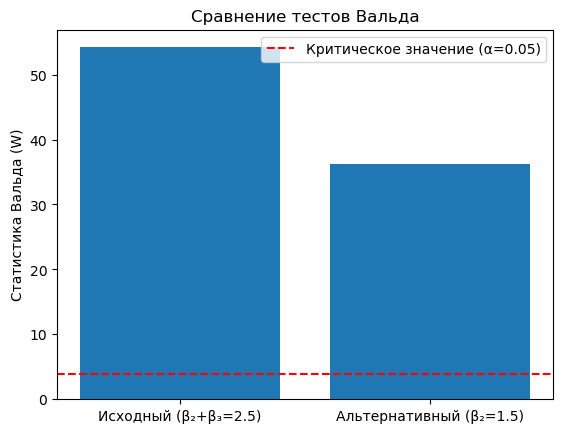

In [24]:
import matplotlib.pyplot as plt

plt.bar(["Исходный (β₂+β₃=2.5)", "Альтернативный (β₂=1.5)"], [W, W_alt])
plt.axhline(y=crit_value, color='r', linestyle='--', label='Критическое значение (α=0.05)')
plt.ylabel("Статистика Вальда (W)")
plt.title("Сравнение тестов Вальда")
plt.legend()
plt.show()